<a href="https://colab.research.google.com/github/sha863/campaign_data_analysis/blob/main/Annalect_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [611]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import calendar
from pandas import ExcelWriter
from pandas import ExcelFile
pd.set_option('display.max_rows', 500)
import warnings; 
warnings.simplefilter('ignore')

from datetime import datetime
from datetime import date

from google.colab import data_table
data_table.enable_dataframe_formatter()

In [612]:
xls = pd.ExcelFile('/content/drive/MyDrive/Campaign data.xlsx')
camp_1 = pd.read_excel(xls, 'Table 1')
camp_2 = pd.read_excel(xls, 'Table 2')

In [613]:
camp_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123699 entries, 0 to 123698
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Date         123699 non-null  datetime64[ns]
 1   Data source  123699 non-null  object        
 2   Campaign     123699 non-null  object        
 3   Media Type   123699 non-null  object        
 4   City         123699 non-null  object        
 5   Metric       123699 non-null  object        
 6   Value        123699 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 6.6+ MB


In [614]:
camp_1.describe()

,Value
count,1.236990e+05
mean,6.973219e+03
std,3.400261e+04
min,0.000000e+00
25%,6.000000e+00
50%,7.536000e+01
75%,1.144900e+03
max,1.627800e+06


In [615]:
camp_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Campaign      58 non-null     object
 1   Message type  58 non-null     object
 2   Model         58 non-null     object
dtypes: object(3)
memory usage: 1.5+ KB


In [616]:
model_data=pd.read_excel(r"/content/drive/MyDrive/Modeling dataset.xlsx")
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   model      36 non-null     object        
 1   month      36 non-null     datetime64[ns]
 2   gas_price  36 non-null     float64       
 3   discount   36 non-null     float64       
 4   sales      36 non-null     int64         
 5   TV         36 non-null     float64       
 6   YouTube    36 non-null     float64       
 7   Radio      36 non-null     float64       
 8   Print      36 non-null     float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 2.7+ KB


In [617]:
round(model_data.describe(),2)

,gas_price,discount,sales,TV,YouTube,Radio,Print
count,36.00,36.00,36.00,36.00,36.00,36.00,36.00
mean,2.49,3566.03,9401.72,36.28,40.62,82.87,0.94
std,0.30,634.92,3201.38,86.35,77.81,88.83,1.19
min,1.84,2169.01,3837.00,0.00,0.00,0.00,0.00
25%,2.22,3226.26,7590.00,0.00,0.00,6.73,0.19
50%,2.55,3414.46,8562.00,0.00,0.00,38.56,0.37
75%,2.77,3639.95,10565.25,25.08,39.40,147.03,1.30
max,2.90,5026.38,19572.00,379.19,304.02,295.44,4.61


# Campaign data solved questions

## Find out the top 5 months in terms of impressions


In [618]:
# Filter by impression
impressions= camp_1[camp_1['Metric']=='Impressions']
impressions.tail()

,Date,Data source,Campaign,Media Type,City,Metric,Value
123684,2021-09-30,Snapchat,Pathfinder campaign 7,Online Video,Milwaukee,Impressions,6741.0
123687,2021-09-30,Snapchat,Pathfinder campaign 7,Online Video,Houston,Impressions,14397.0
123690,2021-09-30,Snapchat,Pathfinder campaign 7,Online Video,Seattle - Tacoma,Impressions,11191.0
123693,2021-09-30,Snapchat,Pathfinder campaign 7,Online Video,Sacramento - Stockton - Modesto,Impressions,7626.0
123696,2021-09-30,Snapchat,Pathfinder campaign 7,Online Video,Dallas - Ft. Worth,Impressions,16579.0


In [619]:
# 1. Extract month from date 
# 2. Sum value wise 
# 3. Sort in descending order
# 4. Select top 5
top5=impressions.groupby(impressions.Date.dt.month)['Value'].sum().sort_values(ascending=False).reset_index().head()
d = dict(enumerate(calendar.month_abbr))
top5['Date'] =top5['Date'].map(d)
top5


,Date,Value
0,Sep,195438584.0
1,Mar,159653850.0
2,Oct,129386691.0
3,Aug,117299580.0
4,Feb,95672149.0


## Which model has maximum impressions?

In [620]:
merged=pd.merge(impressions,camp_2,on='Campaign',how='inner')
merged.groupby('Model')['Value'].sum().sort_values(ascending=False).head(1)

Model
Pathfinder    275832034.0
Name: Value, dtype: float64

## Find out the top 3 campaigns in terms of impressions for every message type

In [621]:
stats=merged.groupby(['Message type', 'Campaign'])['Value'].sum().reset_index()

# First way is to separate data, sort values and print for each message type
First_msg_type=stats[stats["Message type"]=='Future Market'].sort_values('Value', ascending=False)
First_msg_type.head(3)

Second_msg_type=stats[stats["Message type"]=='Near Market'].sort_values('Value', ascending=False)
Second_msg_type.head(3)

pd.concat([First_msg_type.head(3),Second_msg_type.head(3)]).reset_index(drop=True)

,Message type,Campaign,Value
0,Future Market,Altima campaign 3,45451489.0
1,Future Market,Altima campaign 1,35863660.0
2,Future Market,Kicks campaign 4,33664998.0
3,Near Market,Armada campaign 2,118817195.0
4,Near Market,Pathfinder campaign 2,115286607.0
5,Near Market,Pathfinder campaign 6,51823574.0


In [622]:
# Second way, Do above steps using loops
for i in stats["Message type"].unique():
  print(stats[stats["Message type"]==i].sort_values('Value', ascending=False).reset_index(drop=True).head(3))

    Message type           Campaign       Value
0  Future Market  Altima campaign 3  45451489.0
1  Future Market  Altima campaign 1  35863660.0
2  Future Market   Kicks campaign 4  33664998.0
  Message type               Campaign        Value
0  Near Market      Armada campaign 2  118817195.0
1  Near Market  Pathfinder campaign 2  115286607.0
2  Near Market  Pathfinder campaign 6   51823574.0


## Does the campaign with maximum impressions also have maximum clicks?

In [623]:
impressions= camp_1[camp_1['Metric']=='Impressions']
clicks= camp_1[camp_1['Metric']=='Clicks']

In [624]:
impressions.groupby('Campaign')['Value'].sum().sort_values(ascending=False).head(1)

Campaign
Armada campaign 2    118817195.0
Name: Value, dtype: float64

In [625]:
clicks.groupby('Campaign')['Value'].sum().sort_values(ascending=False).head(1)

Campaign
Armada campaign 2    241938.0
Name: Value, dtype: float64

Yes, Armada campaign 2 has maximum impressions as well as maximum clicks

## Find out the top 3 campaigns in terms of CPM (CPM stands for cost per mile which means cost per 1000 impressions. CPM = total media cost/total impressions * 1000)

In [626]:
media_cost= camp_1[camp_1['Metric']=='Media Cost'].reset_index(drop=True)
media_cost.rename(columns = {'Value':'media_cost'}, inplace = True)
impressions.rename(columns = {'Value':'impressions'}, inplace = True)

In [627]:
merged1=pd.merge(impressions,media_cost,on=['Date', 'Data source', 'Campaign', 'Media Type', 'City'],how='inner')
merged1.drop(['Metric_x','Metric_y'], axis=1,inplace=True)
merged1.head()

,Date,Data source,Campaign,Media Type,City,impressions,media_cost
0,2019-12-30,Pinterest,Kicks campaign 2,Display,Colorado Springs-Pueblo,1.0,0.0
1,2019-12-30,Pinterest,Kicks campaign 2,Display,Sacramnto-Stkton-Modesto,1.0,0.0
2,2019-12-30,Pinterest,Kicks campaign 1,Online Video,New York,2.0,0.0
3,2019-12-30,Pinterest,Kicks campaign 1,Online Video,Atlanta,1.0,0.0
4,2019-12-30,Pinterest,Kicks campaign 1,Online Video,Indianapolis,2.0,0.0


In [628]:
impression_media_cost=merged1.groupby('Campaign')['impressions','media_cost'].sum().sort_values(by=['impressions','media_cost'],ascending=False).reset_index()
impression_media_cost

,Campaign,impressions,media_cost
0,Armada campaign 2,118817195.0,698093.58
1,Pathfinder campaign 2,115286607.0,689604.29
2,Pathfinder campaign 6,51823574.0,797639.63
3,shop at home,51361361.0,561969.47
4,Pathfinder campaign 1,48923126.0,261944.37
5,Altima campaign 3,45451489.0,376369.35
6,Armada campaign 4,37470993.0,298919.40
7,Altima campaign 1,35863660.0,489477.29
8,Kicks campaign 4,33664998.0,181523.37
9,Rogue campaign 5,33448074.0,224408.94


In [629]:
# Top 3(Costly) Campaign in terms of CPM
impression_media_cost['CPM']= round((impression_media_cost['media_cost']/ impression_media_cost['impressions'])*1000,2)
impression_media_cost.sort_values(by=['CPM'], ascending=False).head(3)

,Campaign,impressions,media_cost,CPM
28,Pathfinder campaign 3,3977697.0,73584.37,18.50
16,Pathfinder campaign 5,17292561.0,316442.90,18.30
18,Pathfinder campaign 7,16733721.0,304427.70,18.19


## What is the monthly average media cost for different media types?

In [630]:
media_cost= camp_1[camp_1['Metric']=='Media Cost'].reset_index(drop=True)
average=media_cost.groupby([media_cost.Date.dt.month,'Media Type'])['Value'].mean().reset_index()
average.rename(columns = {'Date':'month'}, inplace = True)
d = dict(enumerate(calendar.month_abbr))
average['month'] =average['month'].map(d)
round(average,2)

,month,Media Type,Value
0,Jan,Display,0.00
1,Jan,Online Video,129.65
2,Feb,Display,319.08
3,Feb,Online Video,179.24
4,Mar,Display,286.40
5,Mar,Online Video,175.42
6,Apr,Display,85.70
7,Apr,Online Video,170.39
8,May,Display,0.00
9,May,Online Video,0.00


## Which media type is more expensive in terms of CPM?

In [631]:
media_type_cost=merged1.groupby('Media Type')['impressions','media_cost'].sum().sort_values(by=['impressions','media_cost'],ascending=False).reset_index()
media_type_cost['CPM']= round((media_type_cost['media_cost']/ media_type_cost['impressions'])*1000,2)
media_type_cost

,Media Type,impressions,media_cost,CPM
0,Online Video,674263903.0,6836809.63,10.14
1,Display,220536970.0,1527881.66,6.93


Online Video is more expensive in terms of CPM

## When would you use a Pie chart, a Bar chart and a Line Chart? Use the given dataset and provide an example for each type of chart.

### Pie Chart

Pie charts are often used for showing percentages/count for distinct categories across dataset, generally used when distinct categories are 4-5 as it gives good visual. Below we show metric distribution by pie chart.

But it fails when we plot values in terms of mean for distinct categories. For this, we use bar chart

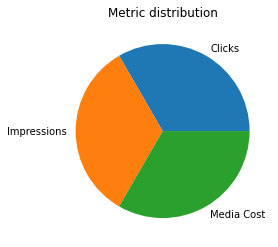

In [632]:
camp_1.groupby("Metric").size().plot.pie(title='Metric distribution',ylabel="")
plt.show()

### Bar Chart

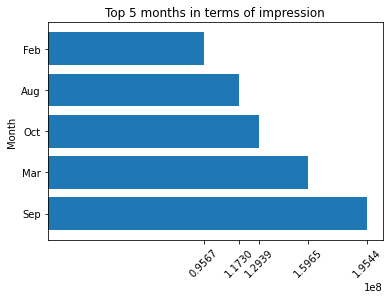

In [633]:
# Top 5 month in terms of impression bar chart
plt.barh(top5['Date'], top5['Value'])
plt.ylabel('Month')
plt.xticks(top5.Value, rotation =45)
plt.title("Top 5 months in terms of impression")
plt.show()

### Line Chart

It connect datapoints using a line, frequently used in timeseries analysis of data.

In [634]:
impressions= camp_1[camp_1['Metric']=='Impressions']
time_data=impressions.set_index("Date")
data_2020_jan=time_data.loc["2020-01"]
data_2020_jan

,Data source,Campaign,Media Type,City,Metric,Value
Date,,,,,,
2020-01-06,Pinterest,Kicks campaign 2,Display,Houston,Impressions,2.0
2020-01-06,Pinterest,Kicks campaign 2,Display,Tulsa,Impressions,1.0
2020-01-06,Pinterest,Kicks campaign 2,Display,Denver,Impressions,1.0
2020-01-06,Pinterest,Kicks campaign 2,Display,Santabarbra-Sanmar-Sanluob,Impressions,3.0
2020-01-06,Pinterest,Kicks campaign 1,Online Video,Indianapolis,Impressions,5.0
2020-01-06,Pinterest,Kicks campaign 1,Online Video,Greenvll-Spart-Ashevll-And,Impressions,6.0
2020-01-06,Pinterest,Kicks campaign 1,Online Video,El Paso (Las Cruces),Impressions,4.0
2020-01-06,Pinterest,Kicks campaign 1,Display,Los Angeles,Impressions,1.0
2020-01-13,Pinterest,Kicks campaign 2,Display,Detroit,Impressions,3.0


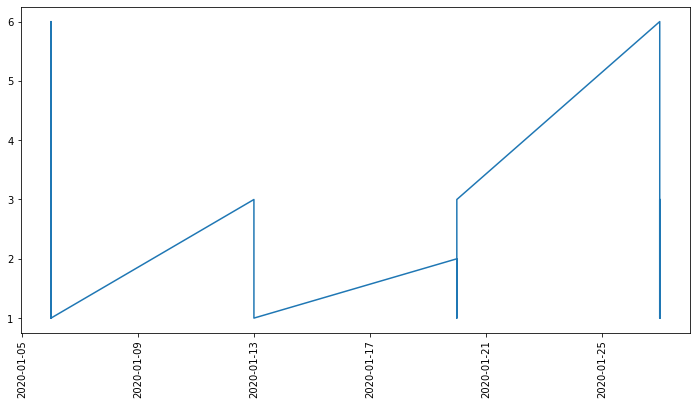

In [635]:
plt.figure(figsize=(12,6))
plt.plot(data_2020_jan.index,'Value', data=data_2020_jan)
plt.xticks(rotation=90)
plt.show()

# Modeling data Solved questions

## Analyze Sales of Altima using a Linear Regression model. 

## Which is your dependent variable?
Since we want to analyse sales hence sales is our dependent variable and rest all are independent variables.

In [636]:
# Importing model data
model_data=round(model_data,2)
model_data.drop(['model','month'],axis=1, inplace=True)

In [637]:
model_data

,gas_price,discount,sales,TV,YouTube,Radio,Print
0,2.76,2169.01,6799,0.00,0.00,0.00,1.40
1,2.90,4745.17,14992,0.00,0.00,3.30,0.22
2,2.89,4895.38,19572,0.00,0.00,6.48,0.15
3,2.85,4923.84,14876,0.00,0.00,11.62,0.68
4,2.84,5026.38,14656,0.00,0.00,32.46,1.63
5,2.84,4793.93,11858,0.00,0.00,6.10,2.57
6,2.86,4461.21,8361,131.93,30.37,4.96,4.61
7,2.65,3736.62,7434,329.16,142.37,41.71,4.40
8,2.37,3027.91,8425,379.19,304.02,220.82,1.24
9,2.25,3312.19,8100,1.35,26.15,115.37,1.70


In [638]:
model_data.corr()

,gas_price,discount,sales,TV,YouTube,Radio,Print
gas_price,1.000000,0.439685,0.602171,-0.000857,-0.109202,0.059462,0.335541
discount,0.439685,1.000000,0.688350,-0.045286,-0.120025,-0.309897,0.234411
sales,0.602171,0.688350,1.000000,-0.101005,-0.019421,-0.045429,-0.035509
TV,-0.000857,-0.045286,-0.101005,1.000000,0.725431,0.110964,0.419606
YouTube,-0.109202,-0.120025,-0.019421,0.725431,1.000000,0.272932,0.309909
Radio,0.059462,-0.309897,-0.045429,0.110964,0.272932,1.000000,0.151132
Print,0.335541,0.234411,-0.035509,0.419606,0.309909,0.151132,1.000000


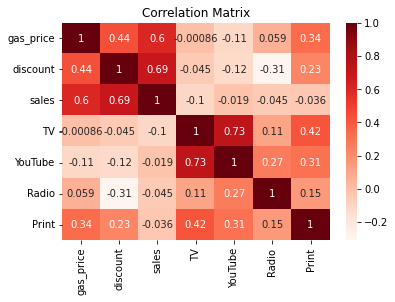

In [639]:
sns.heatmap(model_data.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

From heat map we have following observations.

1. sales and discount column have strong correlation .
2. Sales and gas price have strong correlation.
3. Doscount and gas price also have significant correlation


## Full Data Model

In [640]:
import statsmodels.api as sm
x = model_data[['gas_price', 'discount','TV', 'YouTube', 'Radio', 'Print']]
y = model_data.sales
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()

In [641]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     14.12
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           1.84e-07
Time:                        09:59:19   Log-Likelihood:                -316.54
No. Observations:                  36   AIC:                             647.1
Df Residuals:                      29   BIC:                             658.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.432e+04   2803.653     -5.106      0.0

In [642]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(round(mean_absolute_percentage_error(y, model.predict(x)),2))

15.75


We can see that only discount, gas price, youtube and print columns are the significant in the model as the have p value less than 0.05. Radio and TV are not significant with respect to sales.

## Optmized Model

Selected only statistically significant columns.

In [643]:
x = model_data[['discount','gas_price','Print','YouTube']]
y = model_data.sales
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()

In [644]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     20.26
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           2.74e-08
Time:                        09:59:19   Log-Likelihood:                -318.02
No. Observations:                  36   AIC:                             646.0
Df Residuals:                      31   BIC:                             653.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.386e+04   2795.972     -4.959      0.0

In [645]:
# MAPE
print(round(mean_absolute_percentage_error(y, model.predict(x)),2))

16.66


## Which variables are significant in the model? 

Discount, gas price, youtube and print columns are the significant in the model as the have p value less than 0.05. Radio and TV are not significant with respect to sales.

## How did you evaluate them?

Evaluatd using p value from model Summary

## What is the R2 and Adjusted R2 of the model?


* Before optimizing
1.  R-squared: 0.745
2.  Adj. R-squared:0.692

* After Optimization

1.   R-squared: 0.723
2.   Adj. R-squared: 0.688





## Do you observe multicollinearity in the independent variables?

Yes, discount and gas price have positive correlation 0.44 and both  the columns are positively correlated(0.68 and 0.6 respectively) with sales column.


But both the columns are statistically significant(pvalue less than 0.05) hence both are accountable for providing valuable learning/patterns to our model to predict sales. 

I tried to drop one of those and our R squared and adj R squared drop below 0.5 in that model.That means we are loosing a lot of information and our model would not be generalized if we drop one of those.

This concludes that however we have multicollinearity but it has no strong effect on our target column sales.

## Calculate the MAPE of the model.

* Before optimizing MAPE: 15.75

* After Optimization MAPE: 16.66

